void CeresSolver::AddConstraint(karto::Edge<karto::LocalizedRangeScan> * pEdge)

In [6]:
# The pose difference with respect to a reference pose (pose1 in this case), 
# involves translating the second pose into the coordinate frame of the first pose.
import numpy as np

def normalize_angle(angle):
    """Normalize angle to be within the interval [-pi,pi]."""
    return np.arctan2(np.sin(angle), np.cos(angle))

def pose_difference(pose1, pose2):
    # Extract the coordinates and orientations
    x1, y1, theta1 = pose1
    x2, y2, theta2 = pose2

    # Translate pose2 by the negative of the translation of pose1
    dx = x2 - x1
    dy = y2 - y1

    # Rotate this translated pose by the negative of the orientation of pose1
    x_diff = dx * np.cos(theta1) + dy * np.sin(theta1)
    y_diff = -dx * np.sin(theta1) + dy * np.cos(theta1)

    # Normalize the orientation difference
    theta_diff = normalize_angle(theta2 - theta1)

    return (x_diff, y_diff, theta_diff)

# Define the poses
pose1 = (2.95077, 3.19863, -1.27301)
pose2 = (2.97063, 0.975764, -0.000305283)

# Calculate the pose difference
pose_diff = pose_difference(pose1, pose2)
pose_diff

(2.130860978829012, -0.6332133625089302, 1.2727047169999999)

In [7]:
import numpy as np

# Define the covariance matrix
covariance_matrix = np.array([
    [0.00340139451530056, -0.000630749962635198, 0  ],
    [-0.000630749962635198, 0.00185933916413766, 0 ],
    [0, 0, 0.000131675850185091]
])

# Calculate the inverse of the covariance matrix
inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
inverse_covariance_matrix


array([[ 313.73306355,  106.42873658,    0.        ],
       [ 106.42873658,  573.92967469,    0.        ],
       [   0.        ,    0.        , 7594.40701233]])

In [8]:
# LLT Decomposition and matrixU Details:
# LLT decomposition is used to factorize a positive-definite matrix into the product of a lower triangular matrix and its transpose. 
# It is essentially a Cholesky decomposition, which is a special case of LU decomposition where the matrix being decomposed is symmetric and positive-definite.

# Calculate the The LLT decomposition of the inverse covariance matrix
LLT_decomposition = np.linalg.cholesky(inverse_covariance_matrix)
LLT_decomposition

array([[17.7125115 ,  0.        ,  0.        ],
       [ 6.00867565, 23.19106491,  0.        ],
       [ 0.        ,  0.        , 87.14589498]])

In [5]:
LLT_decomposition * LLT_decomposition.T

array([[ 586.49432451,   -0.        ,    0.        ],
       [  -0.        ,  618.48500126,    0.        ],
       [   0.        ,    0.        , 8392.7852521 ]])

In [3]:
import pandas as pd

# Load the Jacobian matrix from the CSV file
jacobian_df = pd.read_csv('/home/asus/colcon_ws/src/asus_amr/logs/jacobian.csv', delimiter=' ', header=None)

# Check for zero rows
zero_rows = jacobian_df[(jacobian_df.T == 0).all()]

# Print the indices of the zero rows, if any
print("Indices of zero rows:", zero_rows.index.tolist())

Indices of zero rows: []


Plot an elliptical uncertainty figure to explain the Covariance matrix

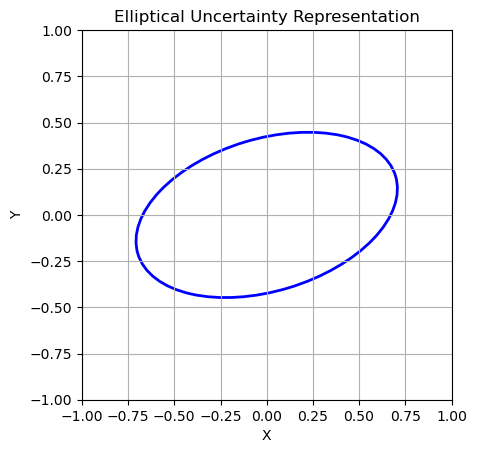

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

# Parameters for covariance matrix
sigma_xx = 0.5  # Variance in X
sigma_yy = 0.2  # Variance in Y
sigma_xy = 0.1  # Covariance between X and Y

# Constructing the covariance matrix
covariance_matrix = np.array([[sigma_xx, sigma_xy], [sigma_xy, sigma_yy]])

# Calculate eigenvalues and eigenvectors for the ellipse representation
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
major_axis = np.sqrt(eigenvalues[0])
minor_axis = np.sqrt(eigenvalues[1])
angle = np.arctan2(eigenvectors[1, 0], eigenvectors[0, 0]) * (180 / np.pi)

# Create an ellipse representing the uncertainty
ellipse = Ellipse(xy=(0, 0), width=2*major_axis, height=2*minor_axis, angle=angle,
                  edgecolor='blue', fc='None', lw=2)

# Plotting
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
ax.add_patch(ellipse)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.grid(True)
ax.set_title('Elliptical Uncertainty Representation')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()